# Simpson's Paradox

### Table of Contents

- [Case 1: Admission Rate](#admission_rate)
- [Case 2: Height Difference in Coffee Drinkers](#height_diff)

<a id='admission_rate'></a>
## Demo \#1 Admission Rate

In [1]:
import os
os.chdir('projects_on_GitHub/udacity_project/Simpsons_Paradox')

In [2]:
pwd

'/Users/alejandrosanz/Downloads/projects_on_GitHub/udacity_project/Simpsons_Paradox'

In [3]:
# Load and view first few lines of dataset
df = pd.read_csv('admission_data.csv')
df.head()

,student_id,gender,major,admitted
0,35377,female,Chemistry,False
1,56105,male,Physics,True
2,31441,female,Chemistry,False
3,51765,male,Physics,True
4,53714,female,Physics,True


### Proportion and admission rate for each gender
- **Proportion of each gender**

In [4]:
df.groupby('gender').student_id.count()

gender
female    257
male      243
Name: student_id, dtype: int64

In [5]:
# Extract the female and male number in the dataset
female_total = df.groupby('gender').student_id.count()['female']
male_total = df.groupby('gender').student_id.count()['male']

print("Female applicants: {}.\nMale applicants: {}.".format(female_total, male_total))


Female applicants: 257.
Male applicants: 243.


In [6]:
# Get the total number of applicants in the dataset
total_applicants = df.shape[0]

# Proportion of applicants that are females and males
female_ratio = female_total / total_applicants
male_ratio = male_total / total_applicants

print("Female proportion of all applicants: {:.2%}.\nMale proportion of all all applicants: {:.2%}".format(female_ratio, male_ratio))

Female proportion of all applicants: 51.40%.
Male proportion of all all applicants: 48.60%


- **Admission rate of each gender**

In [7]:
df.groupby(['gender', 'admitted']).student_id.count()

gender  admitted
female  False       183
        True         74
male    False       125
        True        118
Name: student_id, dtype: int64

In [8]:
admitted_app_byGender = df.groupby(['gender', 'admitted']).student_id.count()

# Extract the admitted number of applicants for each gender
female_admitted = admitted_app_byGender[('female', True)]
male_admitted = admitted_app_byGender[('male', True)]

# Cal the admission rate for each gender
f_admission_rate = female_admitted / female_total
m_admission_rate = male_admitted / male_total

print("Admission rate for females: {:.2%}.\nAdmission rate for males: {:.2%}.".format(f_admission_rate, m_admission_rate))


Admission rate for females: 28.79%.
Admission rate for males: 48.56%.


### Proportion and admission rate for different majors of each gender

**Take `major` into consideration.**

- **Proportion of different majors of each gender**

In [9]:
df.groupby(['major', 'gender']).student_id.count()

major      gender
Chemistry  female    226
           male       18
Physics    female     31
           male      225
Name: student_id, dtype: int64

**(1) In chemistry major**

In [10]:
app_groupBy_MajorGender = df.groupby(['major', 'gender']).student_id.count()

# Extract the female and male applicant number choosing chemistry major
female_chem = app_groupBy_MajorGender[('Chemistry', 'female')]
male_chem = app_groupBy_MajorGender[('Chemistry', 'male')]

# Calculate the proportion of females and males choosing chemistry major respectively
female_chem_ratio = female_chem / female_total
male_chem_ratio = male_chem / male_total

**(2) In physics major**

In [11]:
# Extract the female and male applicant number choosing physics major
female_phys = app_groupBy_MajorGender[('Physics', 'female')]
male_phys = app_groupBy_MajorGender[('Physics', 'male')]

# Calculate the proportion of females and males choosing physics major respectively
female_phys_ratio = female_phys / female_total
male_phys_ratio = male_phys / male_total

**(3) Print out the proportion of females and males for each major**

In [12]:
print("""{:.2%} proportion of females choosing chemistry in all females.
{:.2%} proportion of males choosing chemistry in all males.

{:.2%} proportion of females choosing physics in all females.
{:.2%} proportion of males choosing physics in all males""".format(female_chem_ratio, \
                                                           male_chem_ratio, \
                                                           female_phys_ratio, \
                                                           male_phys_ratio))

87.94% proportion of females choosing chemistry in all females.
7.41% proportion of males choosing chemistry in all males.

12.06% proportion of females choosing physics in all females.
92.59% proportion of males choosing physics in all males


- **Admission rate of different majors of each gender**

In [13]:
df.groupby(['major', 'gender', 'admitted']).student_id.count()

major      gender  admitted
Chemistry  female  False       175
                   True         51
           male    False        16
                   True          2
Physics    female  False         8
                   True         23
           male    False       109
                   True        116
Name: student_id, dtype: int64

In [14]:
app_admitted_byMajorGender = df.groupby(['major', 'gender', 'admitted']).student_id.count()

**(1) In chemistry major**

In [15]:
# Extract the admitted applicant number of female and male of chemistry major
female_admitted_chems = app_admitted_byMajorGender[('Chemistry', 'female', True)]
male_admitted_chems = app_admitted_byMajorGender[('Chemistry', 'male', True)]

# Calculate the admission rate of chemistry major of each gender
female_admissionRate_chems = female_admitted_chems / female_chem
male_admissionRate_chems = male_admitted_chems / male_chem

**(2) In physics major**

In [16]:
# Extract the admitted applicant number of female and male of chemistry major
female_admitted_phys = app_admitted_byMajorGender[('Physics', 'female', True)]
male_admitted_phys = app_admitted_byMajorGender[('Physics', 'male', True)]

# Calculate the admission rate of chemistry major of each gender
female_admissionRate_phys = female_admitted_phys / female_phys
male_admissionRate_phys = male_admitted_phys / male_phys

**(3) Print out the admission rate of each major of each gender**

In [17]:
print("""{:.2%} admission rate of females in all female chemistry applicants.
{:.2%} admission rate of males in all male chemistry applicants.

{:.2%} admission rate of females in all female physics applicants.
{:.2%} admission rate of males in all male applicants.""".format(female_admissionRate_chems, \
                                                           male_admissionRate_chems, \
                                                           female_admissionRate_phys, \
                                                           male_admissionRate_phys))

22.57% admission rate of females in all female chemistry applicants.
11.11% admission rate of males in all male chemistry applicants.

74.19% admission rate of females in all female physics applicants.
51.56% admission rate of males in all male applicants.


### Admission Rate for Each Major

In [18]:
df.groupby('major')['admitted'].mean()

major
Chemistry    0.217213
Physics      0.542969
Name: admitted, dtype: float64

In [19]:
# Extract the admission rate in chemistry major from above.
chem_admissionRate = df.groupby('major')['admitted'].mean()['Chemistry']

# Extract the admission rate in physics major from above.
phys_admissionRate = df.groupby('major')['admitted'].mean()['Physics']

# print out the results
print("Admission rate is {:.2%} in Chemistry Major. \nAdmission rate is {:.2%} in Physics Major.".format(chem_admissionRate, phys_admissionRate))

Admission rate is 21.72% in Chemistry Major. 
Admission rate is 54.30% in Physics Major.


## Summary

**Admission rate in females and males <font color=red>in regardless of majors.</font>**

In [20]:
# Build a multi-index for columns
cols = pd.MultiIndex.from_product([['Male', 'Female'],['Applied', 'Admitted', 'Admission_Rate']])

m_admission_rate1 = '{:.2%}'.format(m_admission_rate)
f_admission_rate1 = '{:.2%}'.format(f_admission_rate)
data = np.array([[male_total, male_admitted, m_admission_rate1, \
                  female_total, female_admitted, f_admission_rate1]])

result1 = pd.DataFrame(data, columns=cols)
result1

Male                          Female                        
  Applied Admitted Admission_Rate Applied Admitted Admission_Rate
0     243      118         48.56%     257       74         28.79%

**We can see from above that it seems admission is preferred for males as ad_rate(M) > ad_rate(F).**

**Admission rate in males and females <font color=red>in different majors</font>.**

In [21]:
male_admissionRate_chems2 = "{:.2%}".format(male_admissionRate_chems)
female_admissionRate_chems2 = "{:.2%}".format(female_admissionRate_chems)
male_admissionRate_phys2 = "{:.2%}".format(male_admissionRate_phys)
female_admissionRate_phys2 = "{:.2%}".format(female_admissionRate_phys)

data_major = np.array([[male_chem, male_admitted_chems, male_admissionRate_chems2, \
                       female_chem, female_admitted_chems, female_admissionRate_chems2], \
                      [male_phys, male_admitted_phys, male_admissionRate_phys2, \
                      female_phys, female_admitted_phys, female_admissionRate_phys2]])
result2 = pd.DataFrame(data_major, columns=cols, index=['Chemistry', 'Physics'])
result2

Male                          Female                        
          Applied Admitted Admission_Rate Applied Admitted Admission_Rate
Chemistry      18        2         11.11%     226       51         22.57%
Physics       225      116         51.56%      31       23         74.19%

**When taking `major` into consideration, we can see that in both physics and chemistry major, the admission rate of females are greater than that of males, which is opposite to the conclusion without majors above.**

***SUMMARY:***  
As the admission rate for chemistry major is lower than that of physics major. And Many more females applied to chemistry major (female_chem_ratio = 87.94%, male_chem_ratio = 7.41%), which had a lower admissions rate.  

Therefore, they had an overall lower admission rate.  Though in reality, females actually had higher admission rates conditionally in both physics and chemistry.  This is known as <font color=red>**Simpson's Paradox**.</font>

<a id='height_diff'></a>
## Height Difference Among Coffee Drinkers

In [38]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [40]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.

(0.10258900080921124, 2.538833370796657)

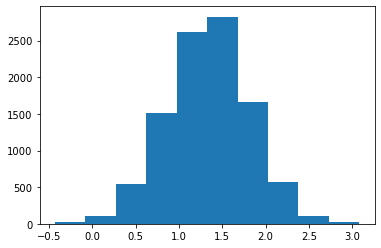

In [39]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    coff_mean = boot_samp[boot_samp.drinks_coffee==True].height.mean()
    no_coff_mean = boot_samp[boot_samp.drinks_coffee==False].height.mean()
    diff = coff_mean - no_coff_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, .5), np.percentile(diffs, 99.5)

___Comment:___ statistical evidence coffee drinkers are on average taller.

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.

(3.366711378170795, 5.132127656262256)

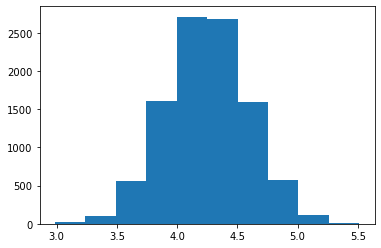

In [42]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    under21_mean = boot_samp[boot_samp.age=='<21'].height.mean()
    over21_mean = boot_samp[boot_samp.age=='>=21'].height.mean()
    diff = over21_mean - under21_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, .5), np.percentile(diffs, 99.5)

___comment:___ Statistical evidence that over 21 y/o are on average taller.

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.

(1.0809572510874992, 2.625869766046186)

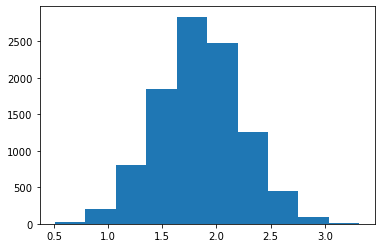

In [44]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    coff_under21_mean = boot_samp[(boot_samp.age=='<21') & (boot_samp.drinks_coffee==True)].height.mean()
    no_coff_under21_mean = boot_samp[(boot_samp.age=='<21') & (boot_samp.drinks_coffee==False)].height.mean()
    diff = no_coff_under21_mean - coff_under21_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

___Comment:___ For the under21 group, we have evidence that the non-coffee drinkers are on average taller.

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below.

(1.828156731814163, 4.408029942439456)

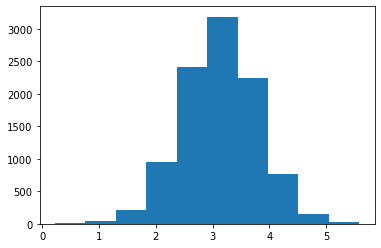

In [45]:
diffs = []

for _ in np.arange(10000):
    boot_samp = sample_data.sample(200, replace=True)
    coff_over21_mean = boot_samp[(boot_samp.age=='>=21') & (boot_samp.drinks_coffee==True)].height.mean()
    no_coff_over21_mean = boot_samp[(boot_samp.age=='>=21') & (boot_samp.drinks_coffee==False)].height.mean()
    diff = no_coff_over21_mean - coff_over21_mean
    diffs.append(diff)

plt.hist(diffs);
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

___Comment:___ For the over21 group, we have evidence that on average the non-coffee drinkers are taller.

### Conclusions:

Within the ___under 21___ and ___over 21___ groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a __misleading result__.  